# 1. Introduction about Movies analytic
Given the dataset (TMDB Movie dataset), create an analytic
report to answer three below questions. The report should
include the introduction, describing the data, visualizations
(scatter plot, bar graph, histogram, boxplot, subplot, pie chart,
heatmap, etc., each graph should have an explained analysis
followed), filtering data to different categories, analysis (include
t-test or Mann-whitney for Hypothesis testing) and conclusions.
1. What areas have the most influence on revenue?
2. How is a movie’s revenue and average score affected by its
genre?
3. What influence does release date have on revenue?

# 2. Import data , over view, transform

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
pd.options.display.max_rows = 99
pd.options.display.max_columns = 500
%matplotlib inline 

def Check_Missing(dataframe):     # check and print missing value
    data_info = pd.DataFrame(dataframe.dtypes).T
    data_info = data_info.append(pd.DataFrame(dataframe.isnull().sum()).T)
    data_info = data_info.append(pd.DataFrame(dataframe.isnull().sum()/dataframe.shape[0]*100).T)
    display(data_info.T)

In [2]:
#read data files
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

#statistics for credits
print("Statistics of credit")
display(credits.describe(include='all').T)
print("Missing value of credit")
Check_Missing(credits)

#statistics for movies
print("Statistics of movies") 
display(movies.describe(include='all').T)
print("Missing value of movies")
Check_Missing(movies)

Statistics of credit


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
movie_id,4803,NaN,NaN,NaN,57165.5,88694.6,5,9014.5,14629,58610.5,459488
title,4803,4800,Out of the Blue,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,4803,4761,[],43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crew,4803,4776,[],28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing value of credit


,0,0,0
movie_id,int64,0,0
title,object,0,0
cast,object,0,0
crew,object,0,0


Statistics of movies


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
budget,4803,NaN,NaN,NaN,2.9045e+07,4.07224e+07,0,790000,1.5e+07,4e+07,3.8e+08
genres,4803,1175,"[{""id"": 18, ""name"": ""Drama""}]",370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homepage,1712,1691,http://www.thehungergames.movie/,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,4803,NaN,NaN,NaN,57165.5,88694.6,5,9014.5,14629,58610.5,459488
keywords,4803,4222,[],412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_language,4803,37,en,4505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_title,4803,4801,Out of the Blue,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,4800,4800,Bambi's tale unfolds from season to season as ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,4803,NaN,NaN,NaN,21.4923,31.8166,0,4.66807,12.9216,28.3135,875.581
production_companies,4803,3697,[],351,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing value of movies


,0,0,0
budget,int64,0,0
genres,object,0,0
homepage,object,3091,64.3556
id,int64,0,0
keywords,object,0,0
original_language,object,0,0
original_title,object,0,0
overview,object,3,0.062461
popularity,float64,0,0
production_companies,object,0,0


Revenue histogram 

Text(0.5,0,'Revenue')

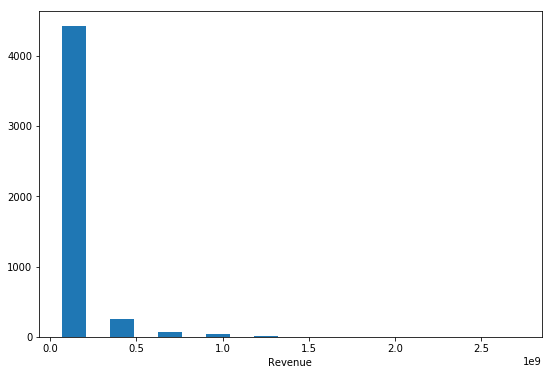

In [3]:
plt.figure(figsize=(9,6))
plt.hist(movies.revenue, normed=0, histtype='bar', rwidth=0.5)
plt.xlabel('Revenue')

** There are 2 rows missing  runtime and 1 row missing release date in  above figure **
- Missing release date will be assigned by '2000-01-01'
- Missing runtime will be assigned by mean value

In [4]:
movies.release_date[movies.release_date.isnull()==True] = '2000-01-01'
movies.runtime[movies.runtime.isnull()==True] = movies.runtime.mean()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



** Convert release date**
 
I would like to check if month/year release have any effect to data, so  "release_month" and "release_year" will be created.

In [5]:
movies['release_month'] = movies.release_date.str[5:7]
movies['release_year'] = movies.release_date.str[0:4]

Text(0.5,0,'Month')

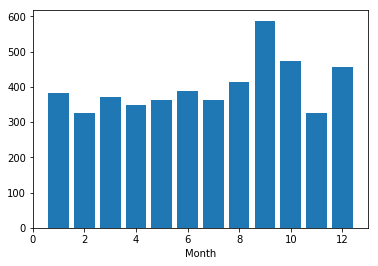

In [72]:
data_summary= movies.groupby('release_month')['revenue'].agg(['sum','count','mean']) #get statistics
plt.bar(data_summary.index.values, data_summary['count'], color="C0")
plt.xlabel('Month')

Text(0.5,0,'Years')

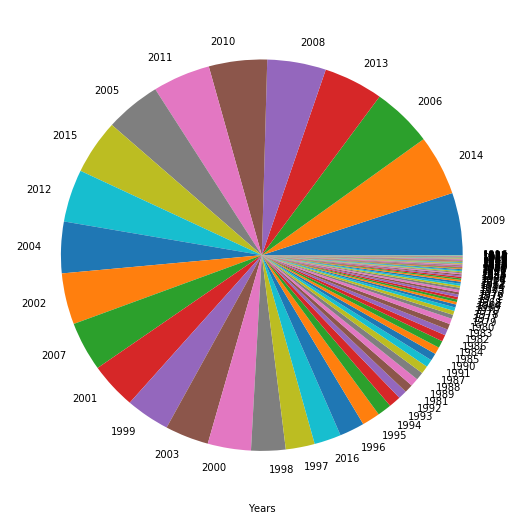

In [7]:
plt.figure(figsize=(9,9))
plt.pie( movies.release_year.value_counts(),
           labels = movies.release_year.value_counts().index)
plt.xlabel('Years')

** Histogram for Runtime column  **

'Runtime mean: 106.87585919600083'

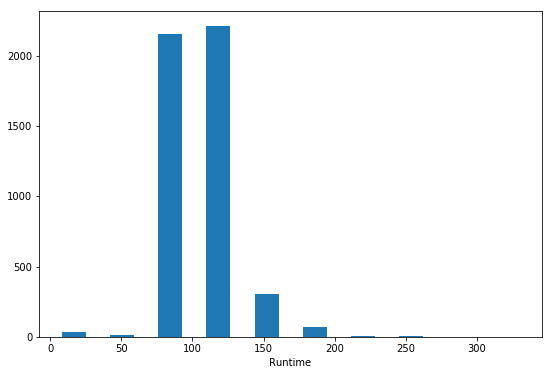

In [8]:
# We will draw histogram for runtime
plt.figure(figsize=(9,6))
plt.hist(movies.runtime[movies.runtime.isnull()==False], normed=0, histtype='bar', rwidth=0.5)
plt.xlabel('Runtime')
display('Runtime mean: ' + str(movies.runtime.mean()))

---
## Process 'genres' data 
For each  film, the genres are encoding in side JSON string, let check 1 sample:

In [9]:
display(movies.genres[0])
display(movies.production_countries[0])

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

Now we need to convert JSON string to multiple genres columns, each column contain 1 if this film fall into this genre, else 0:
- Generate unique genres name from the JSON data
- Load original genres string into data frame, each column will contain 1 genre
- Generate multiple columns genre and set 1 if the film contain this genre, else fill 0 (i.e: film contain genre 'Action' will have value in column ** Genres_Action = 1 **, and doesn't contain genres 'Comedy' will have value in column ** Genres_Comedy = 0 **

In [10]:
#- Generate list of unique name
unique_genres = set()
tuan_1 = dict(movies.genres.apply(json.loads))
for v1 in tuan_1.values(): # v1: contain list of dictionary
    for v2 in v1:
        unique_genres.add(v2['name'])
#list all unique name 
unique_genres=list(unique_genres)
unique_genres.sort()
print('Unique genres:')
display(unique_genres)

#load data from genres to data frame, each columns contain genre each 
temp = pd.DataFrame(movies.genres.apply(json.loads))

#generate new columns 
for x1 in range(0, len(temp)):     # loop all rows
    #print(len(tuan1.genres[x])) 
    for x2 in range (0,len(temp.genres[x1])): #list contain all genres
        for x3 in range (0,len(unique_genres)):            
            if temp.genres[x1][x2]['name']==unique_genres[x3]:              
                temp.loc[x1,'Genres_' + unique_genres[x3]]= int(1.0)
temp.fillna(0, inplace=True)
#Add new genres columns to data
temp.drop(temp.columns[0], axis=1,inplace=True)
movies = pd.concat([movies, temp], axis=1, join_axes=[movies.index])

#create statistics for genres
genres_summary = pd.DataFrame()
for x1 in range (0,len(unique_genres)):
    g_name='Genres_' + unique_genres[x1]
    temp=movies[[g_name,'revenue']][movies[g_name]==1].agg(['sum', 'mean', 'count']).T
    temp.drop([g_name], inplace = True); temp.index = [g_name]
    genres_summary = pd.concat([genres_summary,temp])


Unique genres:


['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [11]:
#Now we convert all object type to Numeric
movies = movies.convert_objects(convert_numeric=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



#### Check missing data last time

In [12]:
Check_Missing(movies)

,0,0,0
budget,int64,0,0
genres,object,0,0
homepage,object,3091,64.3556
id,int64,0,0
keywords,object,0,0
original_language,object,0,0
original_title,float64,4792,99.771
overview,object,3,0.062461
popularity,float64,0,0
production_companies,object,0,0


# 3. Correlation

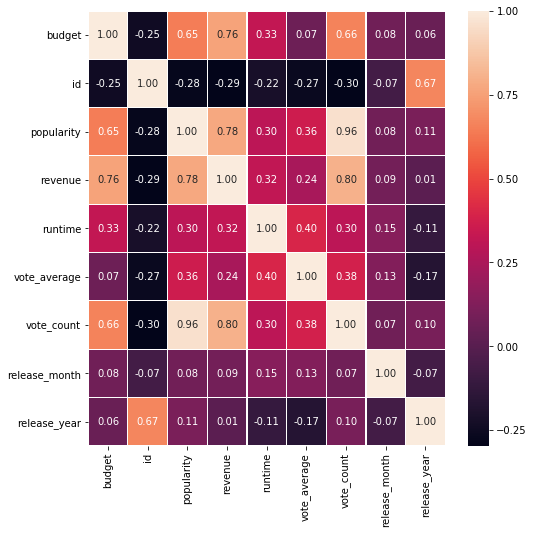

In [13]:
corr=movies.corr(method ='spearman' ,min_periods=200)
corr.dropna(how='all',axis=0,inplace=True);corr.dropna(how='all',axis=1,inplace=True)

fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
display(sns.heatmap(corr, annot=True, linewidths=.2, fmt='.2f' , ax=ax))

# Question 1: What areas have the most influence on revenue?

** Answer for question 1: From the correlation the most areas effect to revenue is vote average/budget ** 

There are high correlation of revenue and budget, popularity, vote count ; and low correlation for runtime, vote average, release_month, release year

Now we will draw some chart to check in detail


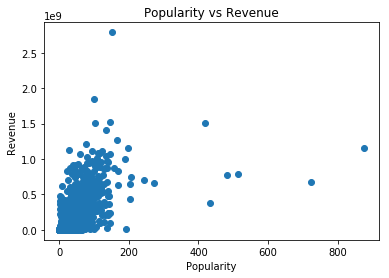

Popularity has high density and there is no clear trend


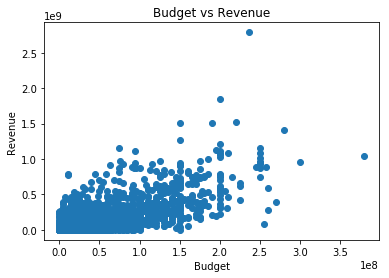

Budget has clear trend, but this is not mean invest high budget can return high revenue


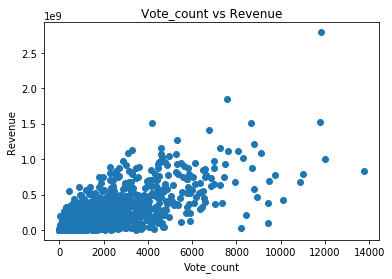

Vote_count has high density from(0:4000) and there is no clear trend


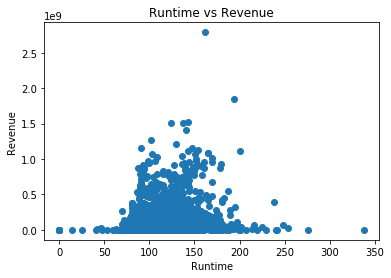

Most film has 2 hours run time so we can not say anything here


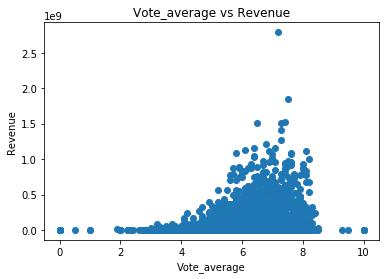

There seem to be a pattern on vote_average, higher vote_average higher revenue


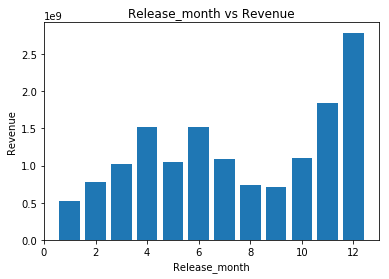

There seem to be a pattern on monthly, but not clear


In [70]:
plt.close('all')
plt.scatter(movies.popularity,movies.revenue ); plt.xlabel('Popularity');  plt.ylabel('Revenue') ; plt.title('Popularity vs Revenue')
plt.show()   
print('Popularity has high density and there is no clear trend')
    
plt.close('all')
plt.scatter(movies.budget,movies.revenue ); plt.xlabel('Budget');  plt.ylabel('Revenue') ; plt.title('Budget vs Revenue')
plt.show()
print('Budget has clear trend')

plt.close('all')
plt.scatter(movies.vote_count,movies.revenue ); plt.xlabel('Vote_count');  plt.ylabel('Revenue') ; plt.title('Vote_count vs Revenue')
plt.show()
print('Vote_count has high density from(0:4000) and there is no clear trend')

plt.close('all')
plt.scatter(movies.runtime,movies.revenue ); plt.xlabel('Runtime');  plt.ylabel('Revenue') ; plt.title('Runtime vs Revenue')
plt.show()
print('Most film has 2 hours run time so we can not say anything here')

plt.close('all')
plt.scatter(movies.vote_average,movies.revenue ); plt.xlabel('Vote_average');  plt.ylabel('Revenue') ; plt.title('Vote_average vs Revenue')
plt.show()
print('There seem to be a pattern on vote_average, higher vote_average higher revenue')


plt.close('all')
plt.scatter(movies.release_month,movies.revenue ); plt.xlabel('Release_month');  plt.ylabel('Revenue') ; plt.title('Release_month vs Revenue')
plt.show()
print('There seem to be a pattern on monthly, but not clear')

# Question 2: How is a movie’s revenue and average score affected by its genre?

** From below chart we can see the top of revenue come from : Tv movies, fiction, romance, history, foreign; because these genres have high number and high revenue **

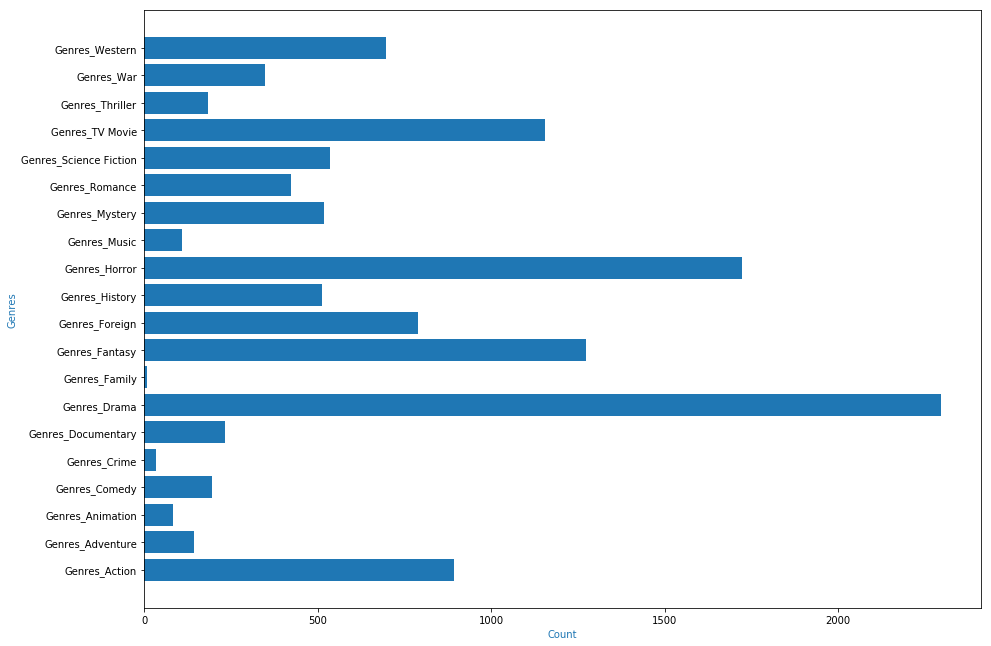

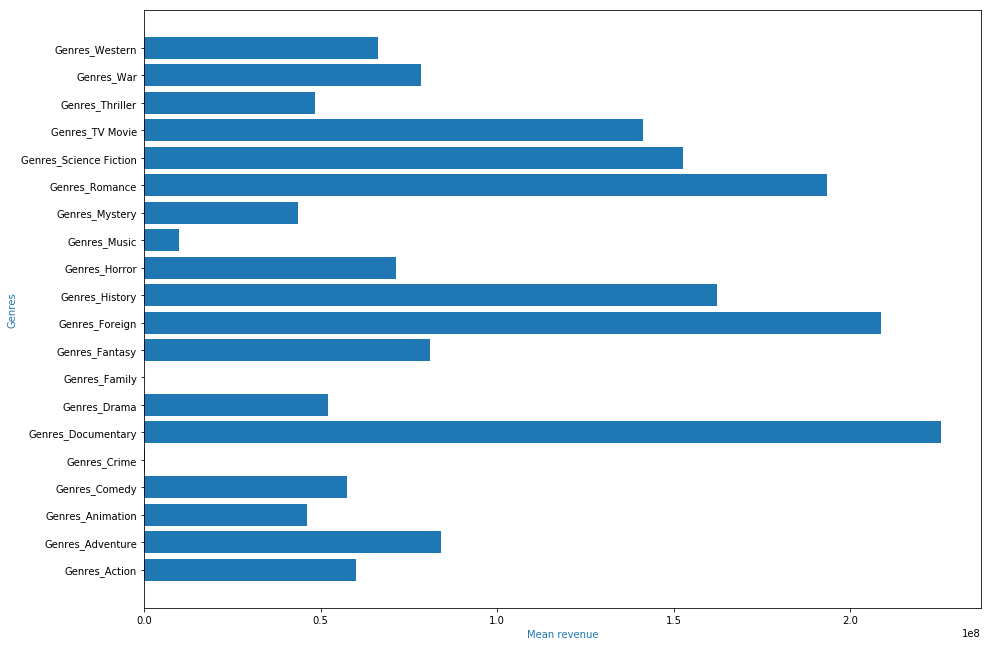

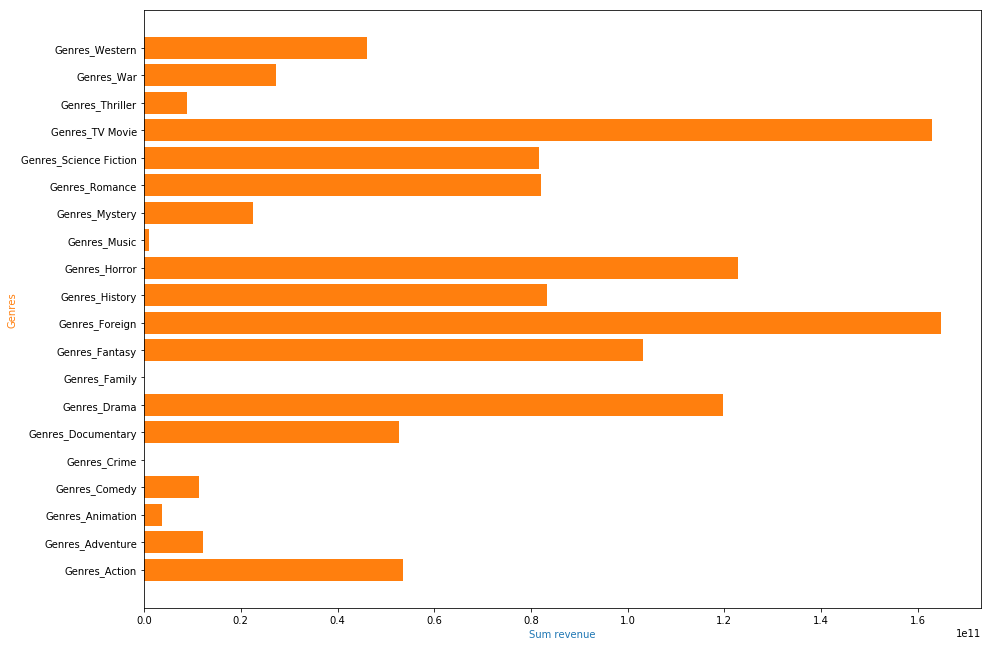

In [128]:
plt.close('all');fig=plt.figure(figsize=(15,11));
ax=fig.add_subplot(111, label="0");

ax.barh(genres_summary.index.values, data_summary['count'], color="C0")
ax.set_xlabel("Count", color="C0"); ax.set_ylabel("Genres", color="C0")
plt.show() 

plt.close('all');fig=plt.figure(figsize=(15,11));
ax=fig.add_subplot(111, label="0");

ax.barh(genres_summary.index.values, data_summary['mean'], color="C0")
ax.set_xlabel("Mean revenue", color="C0"); ax.set_ylabel("Genres", color="C0")
plt.show() 


plt.close('all');fig=plt.figure(figsize=(15,11));
ax=fig.add_subplot(111, label="0");

ax.barh(genres_summary.index.values, data_summary['sum'], color="C1")
ax.set_xlabel("Sum revenue", color="C0"); ax.set_ylabel("Genres", color="C1")
plt.show() 

# Question 3: What influence does release date have on revenue?

Answer for question 3: release months have highest effect on June/December, at summer and holidays ending of year


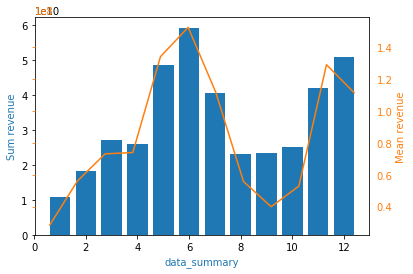

In [49]:
data_summary= movies.groupby('release_month')['revenue'].agg(['sum','count','mean']) #get statistics
plt.close('all');fig=plt.figure();
ax=fig.add_subplot(111, label="1"); ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.bar(data_summary.index.values, data_summary['sum'], color="C0")
ax.set_xlabel("data_summary", color="C0"); ax.set_ylabel("Sum revenue", color="C0")

ax2.plot(data_summary.index.values, data_summary['mean'], color="C1")
ax2.set_ylabel('Mean revenue', color="C1"); ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off' , colors="C1")
ax2.tick_params(axis='y', which='both', labelleft='off', right='off', labelright='on' , colors="C1")

plt.show()


** Answer for question 3: release months have peak  on June/December --at summer / holidays ending of year-- and has lowest on new year-Janury **